In [257]:
import numpy as np
import matplotlib.pyplot as plt

from math import sin, exp, sqrt

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

<h2>Carregando dados de treino</h2>

In [258]:
data = []
labels = []

for i in range(0, 101):
    s = sqrt(1 + sin(i + (sin(i) ** 2)))
    data.append(i)
    labels.append(s)
    
X_train = np.array(data).reshape(-1, 1)
y_train = np.array(labels)

X_train.shape

(101, 1)

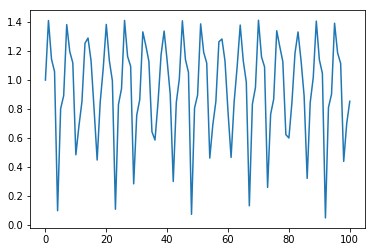

In [259]:
plt.plot(y_train)
plt.show()

In [260]:
model = MLPRegressor()

In [261]:
model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [262]:
X_test = np.array([[101], [110], [200]])
X_test.shape

(3, 1)

In [263]:
test_labels = []

test_labels.append(sqrt(1 + sin(101 + (sin(101) ** 2))))
test_labels.append(sqrt(1 + sin(110 + (sin(110) ** 2))))
test_labels.append(sqrt(1 + sin(200 + (sin(200) ** 2))))

y_test = np.array(test_labels)
y_test

array([ 1.27421269,  0.97662783,  0.8397417 ])

In [264]:
result = model.predict(X_test)
result

array([ 0.44824581,  0.48663651,  0.87054349])

In [265]:
[coef.shape for coef in model.coefs_]

#model.coefs_

[(1, 100), (100, 1)]

Training set score: -4.435921
Test set score: -8.355496


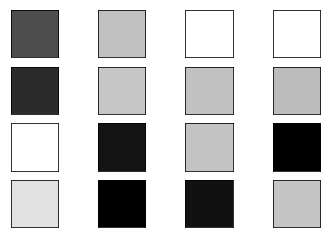

In [266]:
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(-1, 1), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

<h2>Root Mean Square Error</h2>

Root Mean Square Error é uma métrica usada para medir as diferenças entre os valores reais e preditos pelo modelo.
Essa diferença é normalmente chamada de resíduos que são calculados a partir do desvio padrão dos erros de predição.

In [267]:
RMSE = mean_squared_error(y_test, result)**0.5
print("Erro médio nas predições: %f" % RMSE)

Erro médio nas predições: 0.554756


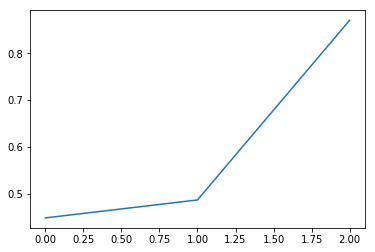

In [268]:
plt.plot(result)
plt.show()

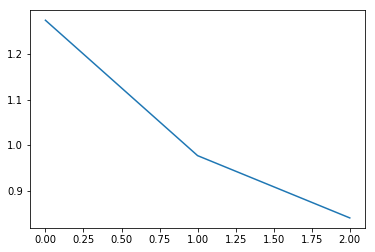

In [269]:
plt.plot(y_test)
plt.show()